## I. Introduction

Name    : Theo Nugraha

### I.I. Project Background

I am a data scientist who has a client who is the CEO of one of the largest companies in Boston. He often uses ride-hailing platforms like Uber and Lyft to support his high mobility. One day he felt that the fare for his trip was not the same even though the distance was the same. In this case, I was asked to predict his travel fares and find out what factors affect the travel fares to make it easier for him to manage his finances.

### I.II. About Dataset

[**SOURCE DATASET**](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)

This dataset contains detailed data of UBER & Lyft located in Boston from November 26, 2018 to December 18, 2018. This dataset contains of hour, day, month, distance, name, cab type, temperature, etc.

### I.III. Objective

This project aims to predict the price of rides on the ride-hailing platform of the company Uber & Lyft in Boston, so we can know the price if we want to go to somewhere based on distance, hour, day, temperature, name (Uber or Lyft) and cab type.

## II. Import Library

In [83]:
#Import Library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

## III. Data Loading

In [7]:
# Data Loading

df = pd.read_csv('rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [8]:
# Duplicate Dataset

data_backup = df.copy()

In [9]:
# Check Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In this dataset, there are 57 columns with 29 columns of float data type, 17 columns of integer data type and 11 columns of object data type.

In [10]:
# Check Missing Value

df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [11]:
# Check Missing Value Percentage

price_null               = df['price'].isna().sum()
percentage_price_null    = price_null / df['price'].shape[0] * 100
print('Missing Value Percentage of price: ',percentage_price_null)

Missing Value Percentage of price:  7.949402009317949


There are missing values as much as 55.095 data or 7.95% in the `price` column.

In [12]:
# Duplication Check 

df.duplicated().sum()

0

Based on the duplication check, there are no duplicated rows.

In [13]:
# Check Basic Statistic

df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Based on the basic statistics check above, there are several findings, namely:
1. Based on the distribution, the variables `distance` and `temperature` seem to be quite symmetrical. This is because the mean and median (50th percentile) values are close.
2. There is no indication of data that has unnatural values, such as minus values.
3. The minus value is only found in the variable `longitude` and it is reasonable because the variable serves to indicate the longitude of a place.

## IV. Exploratory Data Analysis (EDA)

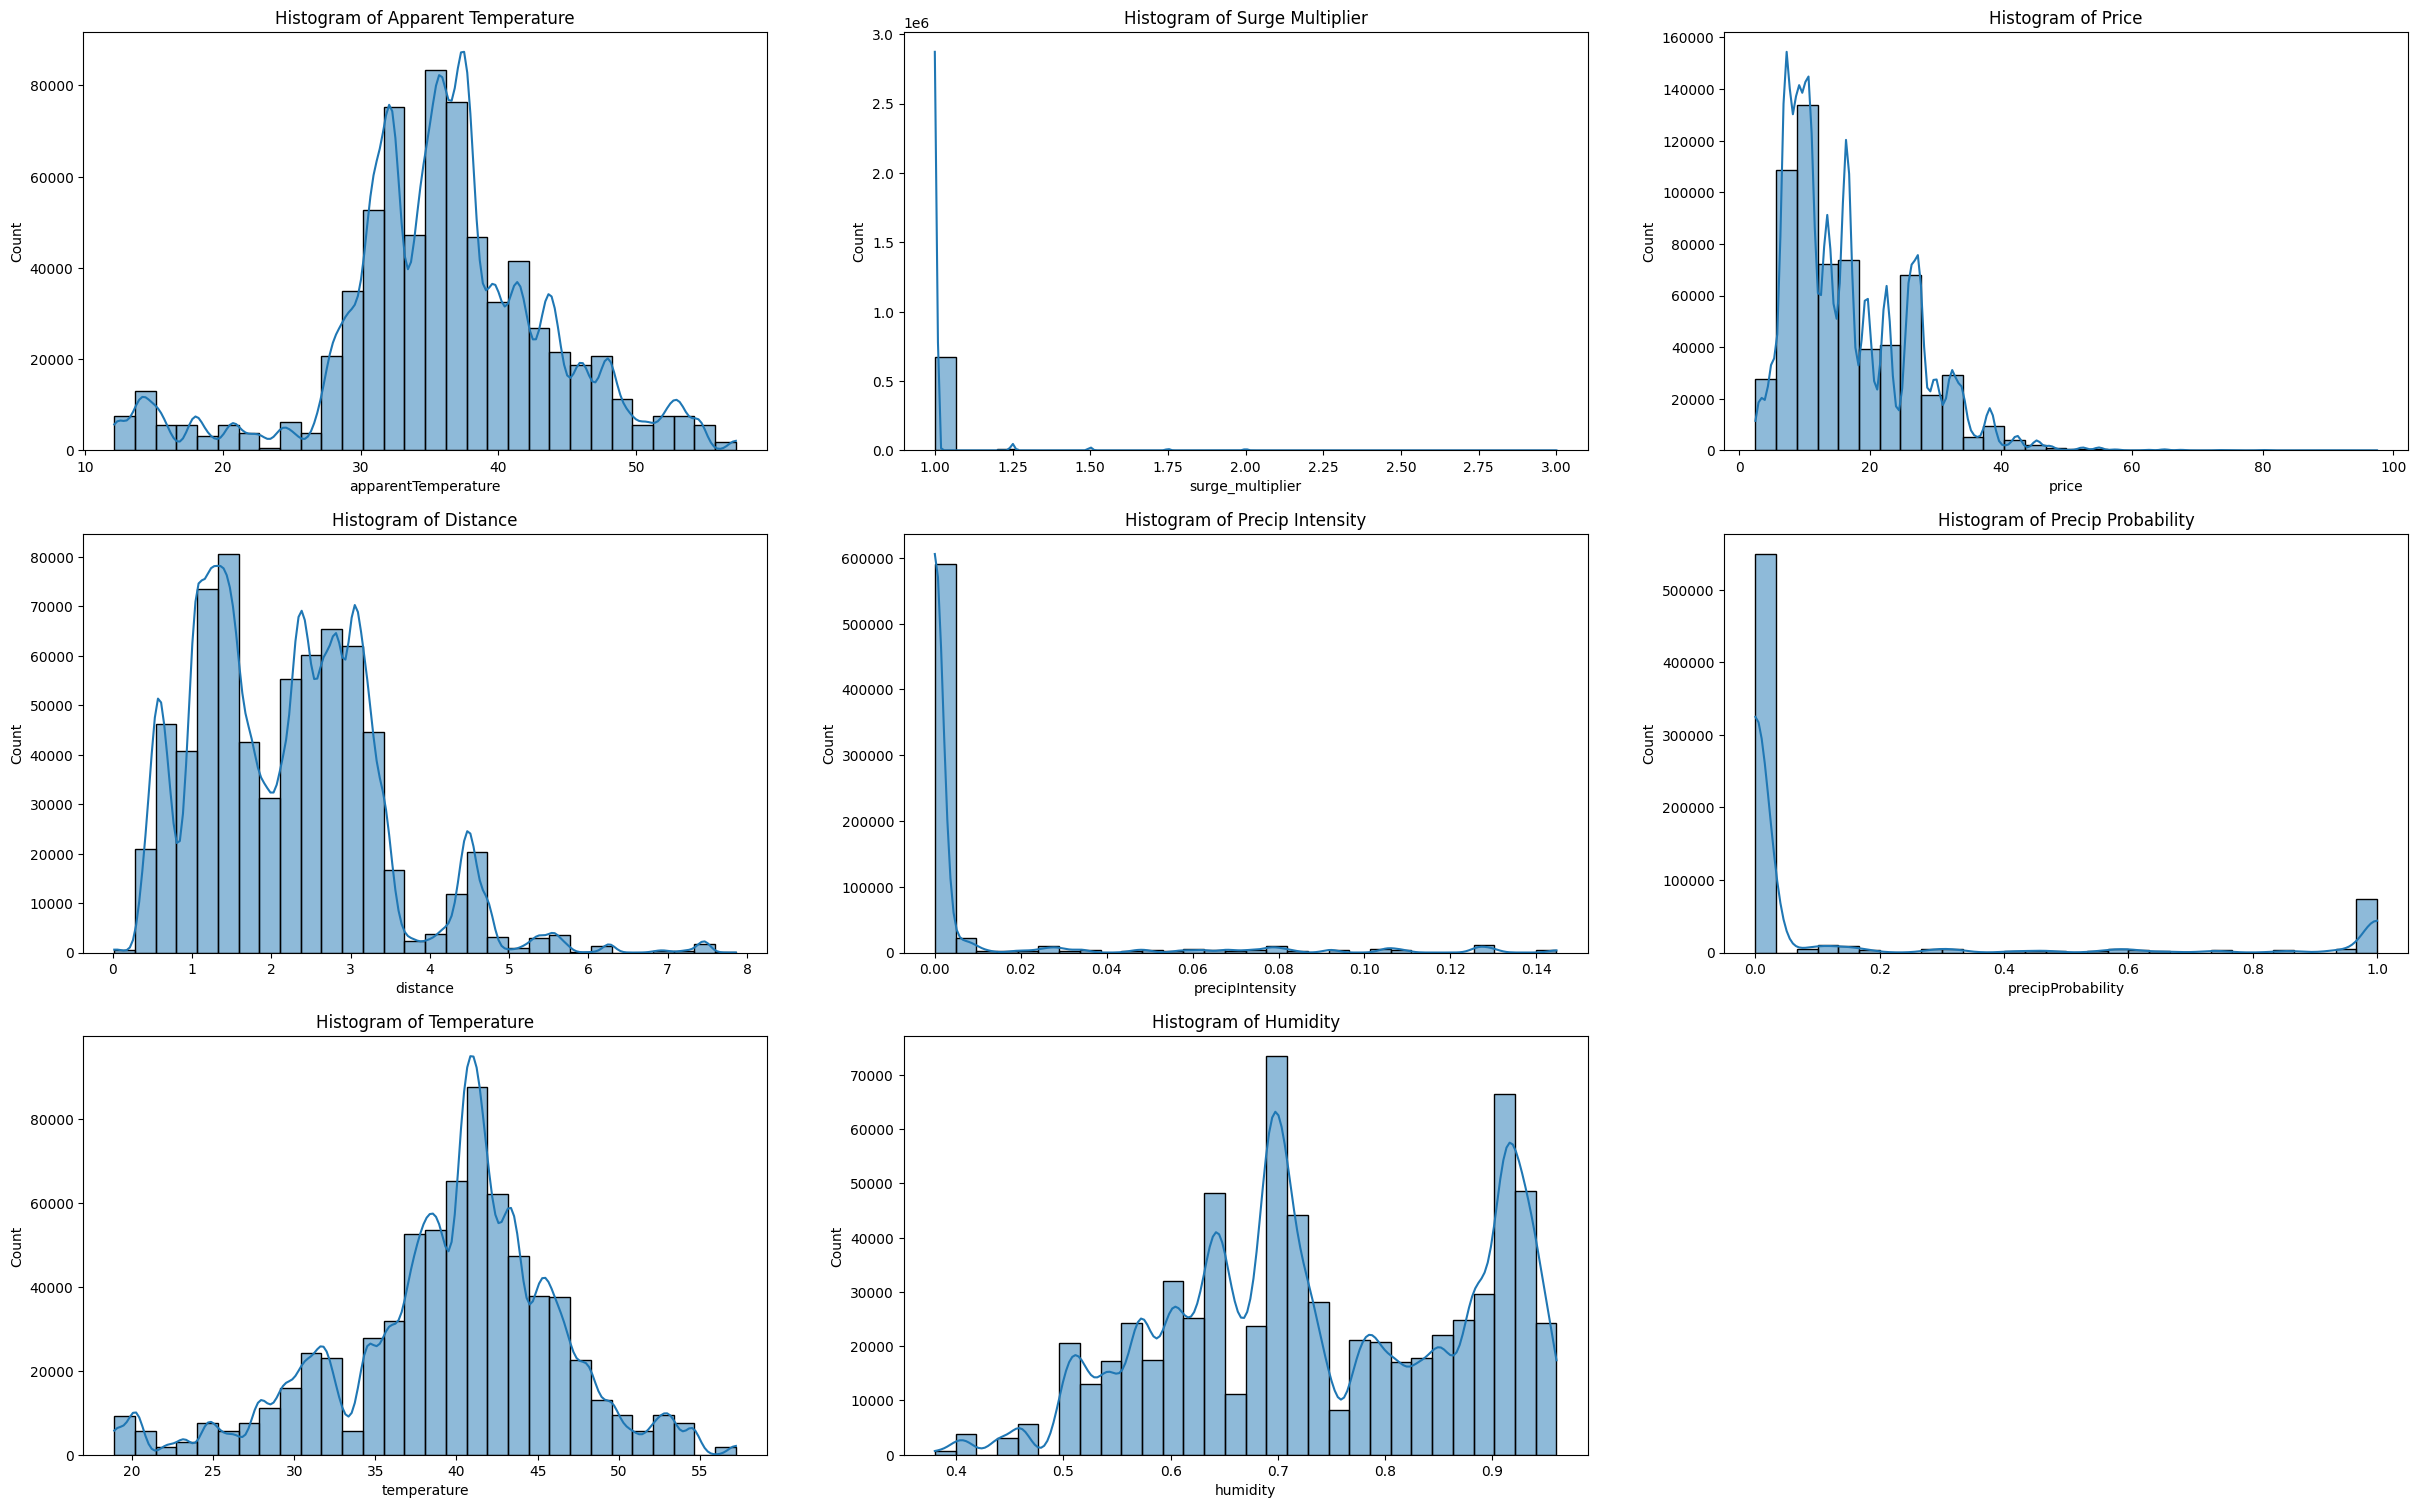

In [14]:
# Create Histogram

plt.figure(figsize=(30,25))

plt.subplot(4,3,1)
sns.histplot(df['apparentTemperature'], kde=True, bins = 30)
plt.title('Histogram of Apparent Temperature')

plt.subplot(4,3,2)
sns.histplot(df['surge_multiplier'], kde=True, bins = 30)
plt.title('Histogram of Surge Multiplier')

plt.subplot(4,3,3)
sns.histplot(df['price'], kde=True, bins = 30)
plt.title('Histogram of Price')

plt.subplot(4,3,4)
sns.histplot(df['distance'], kde=True, bins = 30)
plt.title('Histogram of Distance')

plt.subplot(4,3,5)
sns.histplot(df['precipIntensity'], kde=True, bins = 30)
plt.title('Histogram of Precip Intensity')

plt.subplot(4,3,6)
sns.histplot(df['precipProbability'], kde=True, bins = 30)
plt.title('Histogram of Precip Probability')

plt.subplot(4,3,7)
sns.histplot(df['temperature'], kde=True, bins = 30)
plt.title('Histogram of Temperature')

plt.subplot(4,3,8)
sns.histplot(df['humidity'], kde=True, bins = 30)
plt.title('Histogram of Humidity')

plt.show;


In [15]:
# Check Skewness 

print('FEATURES SKEWNESS')
print('-----------------')
print('')
print('Skewness apparentTemperature  : ',df['apparentTemperature'].skew())
print('Skewness surge_multiplier     : ',df['surge_multiplier'].skew())
print('Skewness price                : ',df['price'].skew())
print('Skewness distance             : ',df['distance'].skew())
print('Skewness precipIntensity      : ',df['precipIntensity'].skew())
print('Skewness precipProbability    : ',df['precipProbability'].skew())
print('Skewness temperature          : ',df['temperature'].skew())
print('Skewness humidity             : ',df['humidity'].skew())

FEATURES SKEWNESS
-----------------

Skewness apparentTemperature  :  -0.3937748417738726
Skewness surge_multiplier     :  8.32024804653164
Skewness price                :  1.0457470560899256
Skewness distance             :  0.8343950077972692
Skewness precipIntensity      :  3.325535588697971
Skewness precipProbability    :  2.0278701678390942
Skewness temperature          :  -0.6090401295944383
Skewness humidity             :  -0.07539532214484873


Based on the histogram and skewness level, we can see that there are some data that are not normally distributed and the skewness level tends to the right, such as in surge_multiplier, precipIntensity and precipProbability.

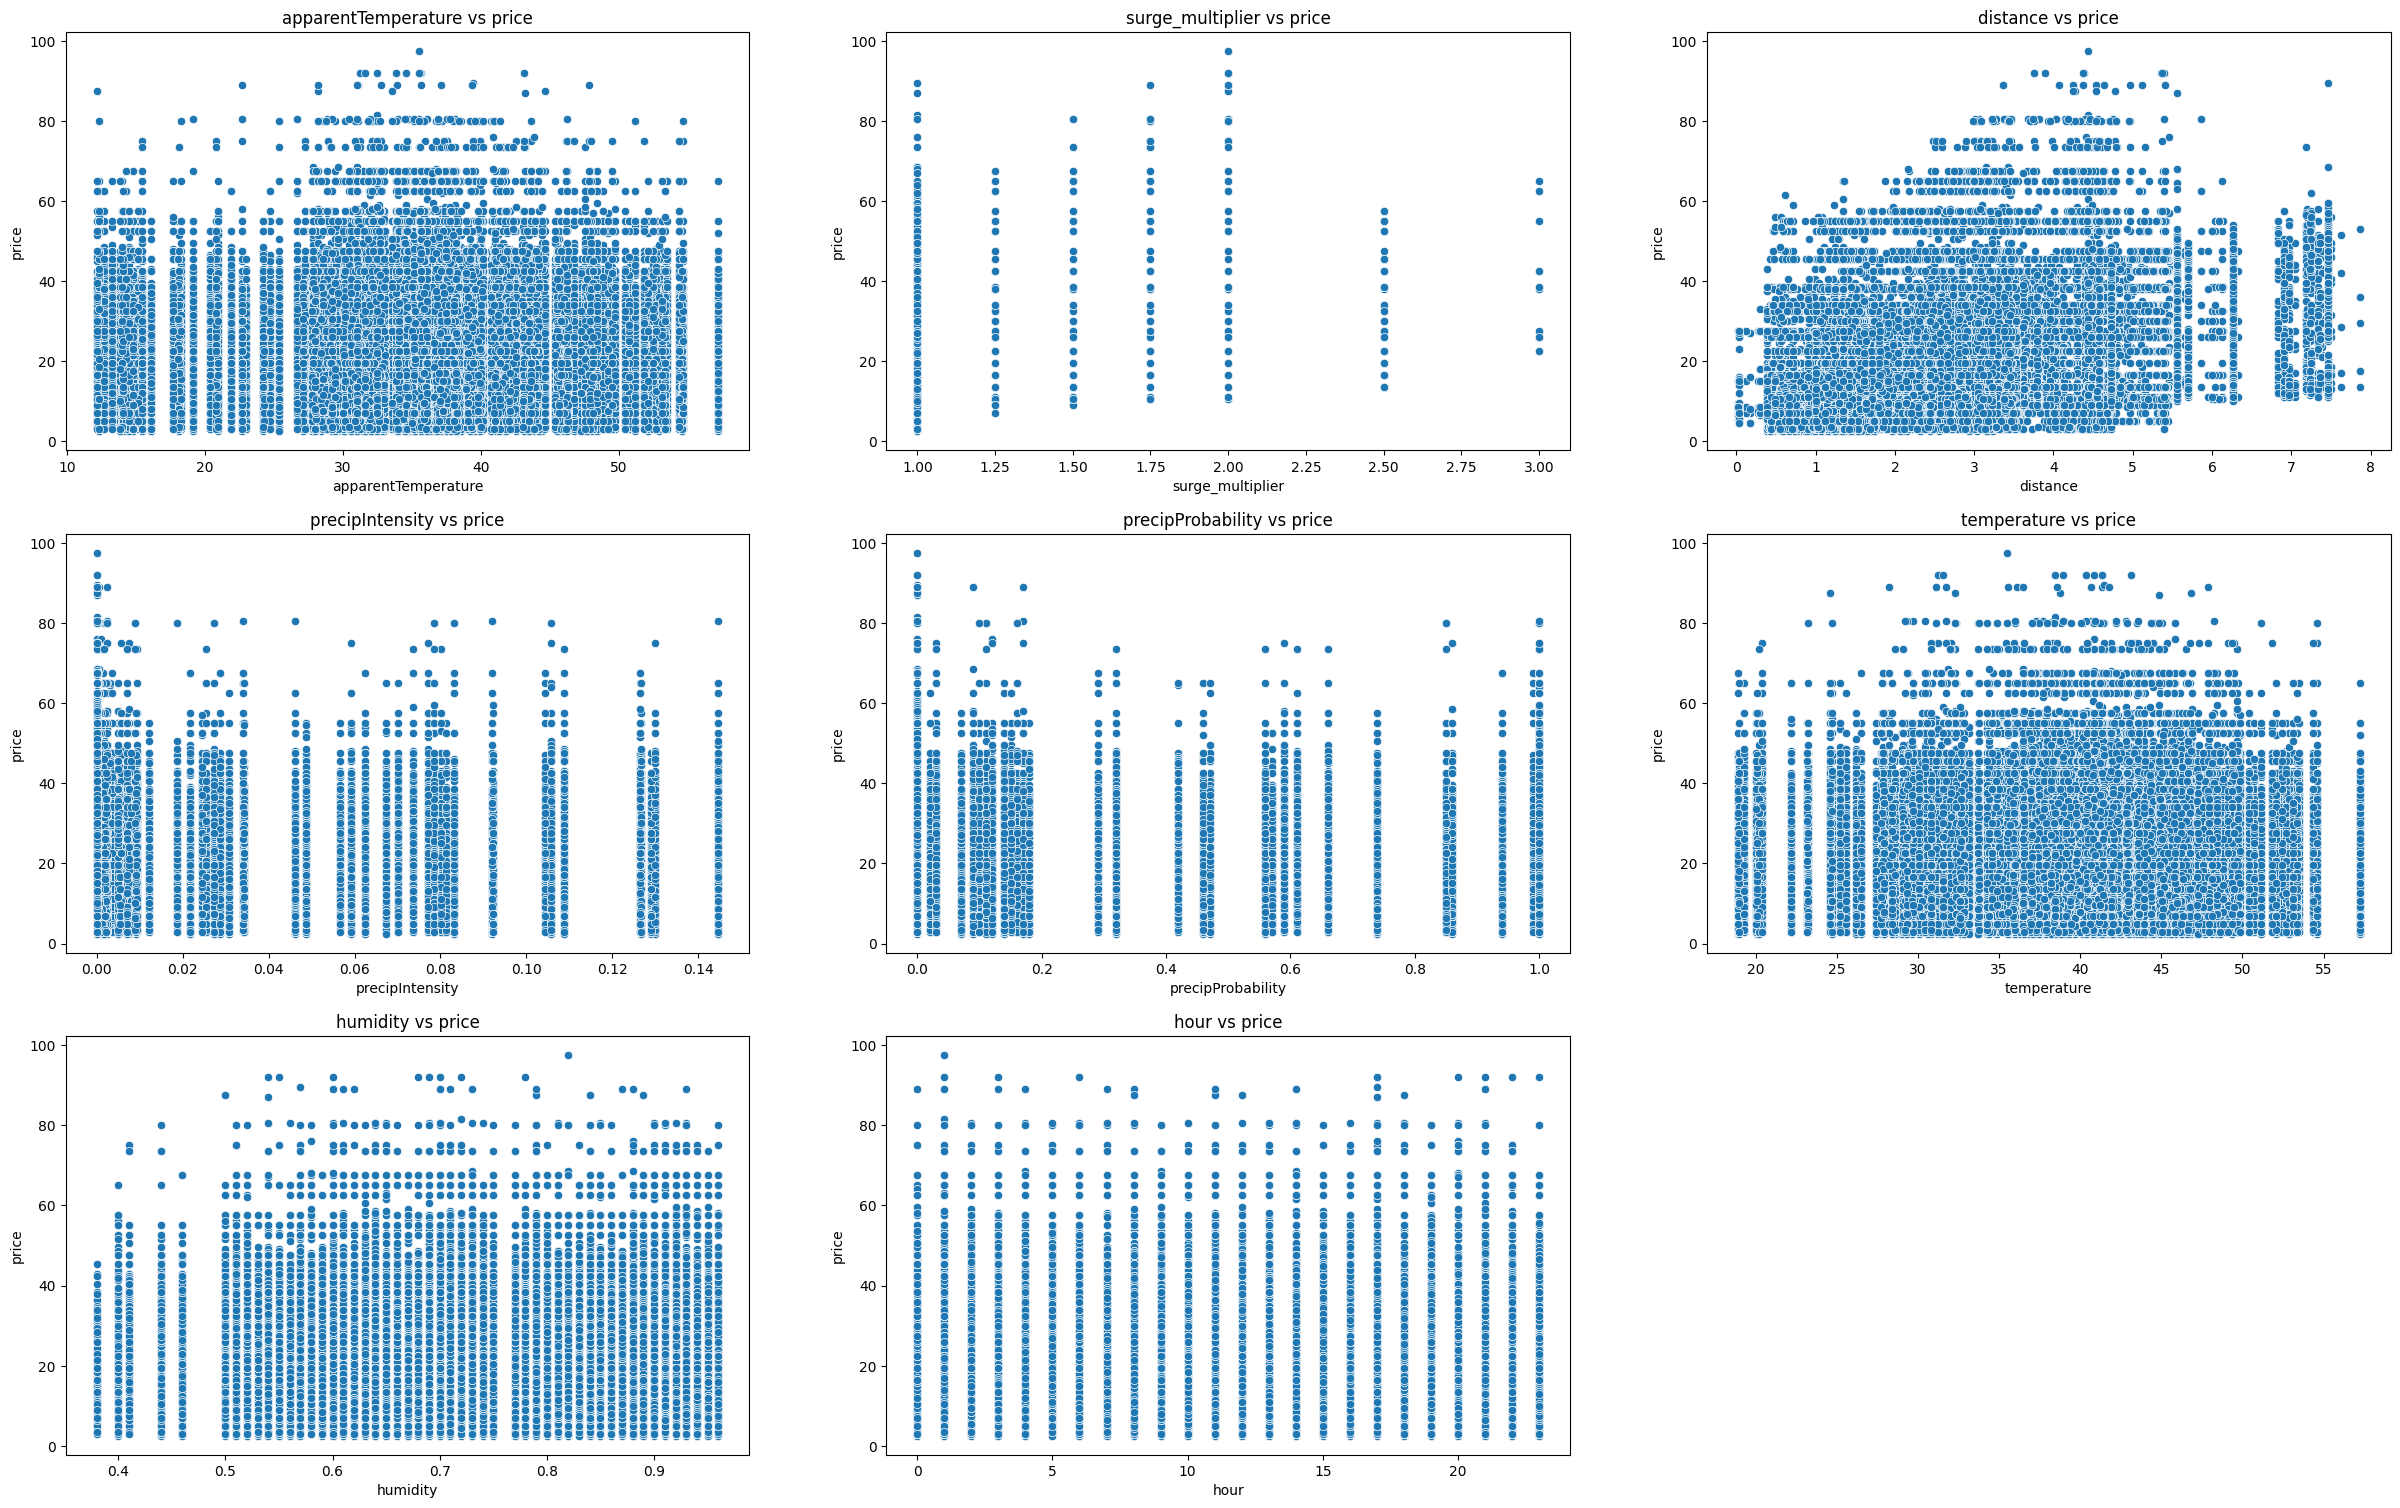

In [16]:
# Create Scatter Plot

plt.figure(figsize=(30,25))

plt.subplot(4,3,1)
sns.scatterplot(x = 'apparentTemperature', y = 'price', data = df)
plt.title('apparentTemperature vs price')

plt.subplot(4,3,2)
sns.scatterplot(x = 'surge_multiplier', y = 'price', data = df)
plt.title('surge_multiplier vs price')

plt.subplot(4,3,3)
sns.scatterplot(x = 'distance', y = 'price', data = df)
plt.title('distance vs price')

plt.subplot(4,3,4)
sns.scatterplot(x = 'precipIntensity', y = 'price', data = df)
plt.title('precipIntensity vs price')

plt.subplot(4,3,5)
sns.scatterplot(x = 'precipProbability', y = 'price', data = df)
plt.title('precipProbability vs price')

plt.subplot(4,3,6)
sns.scatterplot(x = 'temperature', y = 'price', data = df)
plt.title('temperature vs price')

plt.subplot(4,3,7)
sns.scatterplot(x = 'humidity', y = 'price', data = df)
plt.title('humidity vs price')

plt.subplot(4,3,8)
sns.scatterplot(x = 'hour', y = 'price', data = df)
plt.title('hour vs price')

plt.show;

Based on the scatter plot, we can see that there are columns that are less proportional to the price or unbalanced, such as in surge_multiplier, precipIntensity, precipProbability and precipIntensityMax.

In [17]:
# Show average price based on cab_type

df.groupby('cab_type')['price'].mean()

cab_type
Lyft    17.351396
Uber    15.795343
Name: price, dtype: float64

Based on the analysis above, we can see that the average price of Lyft is higher than Uber. The difference is $1,556.

In [18]:
# Show total price based on cab_type

df.groupby('cab_type')['price'].sum()

cab_type
Lyft    5333957.98
Uber    5221435.00
Name: price, dtype: float64

Based on the analysis above, we can see that the summary price of Lyft is higher than Uber. The difference is $112,522.98

In [19]:
# Show total distance based on cab_type

df.groupby('cab_type')['distance'].sum().sort_values(ascending=False)

cab_type
Uber    845136.48
Lyft    672293.79
Name: distance, dtype: float64

Based on the analysis above, we can see that the summary distance of Uber is higher than Lyft. The difference is 172,842.69.

In [20]:
# Show unique value on name

df.name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [21]:
# Show count of unique value on name

df.name.nunique()

13

There are 13 unique values in the `name` column that contain the class divisions of the car fleet.

In [22]:
# Show unique value on product_id

df.product_id.unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2',
       '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'], dtype=object)

In [23]:
# Show count of unique value on product_id

df.product_id.nunique()

13

There are 13 unique values in the `product_id` column that contain the product divisions of the car fleet.

In [24]:
# Show price which name is Taxi

df[(df['name'] == 'Taxi')][['hour', 'day', 'cab_type', 'name', 'distance', 'temperature', 'price']]

,hour,day,cab_type,name,distance,temperature,price
18,14,1,Uber,Taxi,1.11,36.99,NaN
31,23,2,Uber,Taxi,2.48,48.83,NaN
40,20,29,Uber,Taxi,2.94,42.50,NaN
60,20,13,Uber,Taxi,1.16,33.15,NaN
69,13,30,Uber,Taxi,2.67,31.80,NaN
...,...,...,...,...,...,...,...
693025,15,15,Uber,Taxi,2.50,50.71,NaN
693047,1,29,Uber,Taxi,0.91,38.42,NaN
693049,1,29,Uber,Taxi,1.79,38.42,NaN
693060,5,2,Uber,Taxi,1.61,38.19,NaN


Based on the analysis above, the `name` column containing 'Taxi' indicates missing value in the `price` column.

## V. Feature Engineering

### V.I. Split between X (Features) and y (Target)

In [25]:
# Splitting between X and y

X = df.drop(['price'], axis=1)
y = df['price']

X.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [26]:
# Show shape on X and y

print(X.shape)
print(y.shape)

(693071, 56)
(693071,)


### V.II. Feature Selection

Based on this resource [**Strategi Penetapan Harga**](https://pengayaan.com/strategi-penetapan-harga-apa-yang-digunakan-uber.html) , Uber and Lyft's pricing is influenced by the following factors:
1. Trip length
2. Trip duration
3. Bad weather
4. Rush hour
5. Surge in demand

Therefore the features I chose are:
1. distance
2. hour
3. day
4. temperature
5. cab_type
6. name

In [27]:
# Remove feature 

X.drop(['id', 'timestamp', 'month', 'datetime', 'timezone', 'source', 'destination', 
             'product_id', 'latitude', 'longitude', 'apparentTemperature',
             'short_summary', 'long_summary', 'precipIntensity', 'precipProbability',
             'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
             'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
             'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow',
             'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing',
             'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime',
             'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
             'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime',
             'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'surge_multiplier'], axis=1, inplace=True)

X

,hour,day,cab_type,name,distance,temperature
0,9,16,Lyft,Shared,0.44,42.34
1,2,27,Lyft,Lux,0.44,43.58
2,1,28,Lyft,Lyft,0.44,38.33
3,4,30,Lyft,Lux Black XL,0.44,34.38
4,3,29,Lyft,Lyft XL,0.44,37.44
...,...,...,...,...,...,...
693066,23,1,Uber,UberXL,1.00,37.05
693067,23,1,Uber,UberX,1.00,37.05
693068,23,1,Uber,Taxi,1.00,37.05
693069,23,1,Uber,Black SUV,1.00,37.05


In [28]:
# Cardinality Checking

print('Number of categories in the variable cab_type     : {}'.format(len(X.cab_type.unique())))
print('Number of categories in the variable name         : {}'.format(len(X.name.unique())))


Number of categories in the variable cab_type     : 2
Number of categories in the variable name         : 13


Based on the cardinality check, the variable `cab_type` has only 2 categories and the variable `name` has only 13 categories. This indicates that both variables belong to low cardinality.

### V.III. Split between Train-set and Test-set

I will divide the data into 2, namely data for train and data for test. In this case, I will use an 80/20 ratio with 80% being the data for train and 20% being the data for test.

In [29]:
# Splitting between train set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 17)

print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)
X_train.head(3)

Train size :  (554456, 6)
Test size :  (138615, 6)


,hour,day,cab_type,name,distance,temperature
499043,14,13,Uber,Black SUV,1.61,25.55
419201,16,27,Lyft,Shared,2.00,41.00
395682,10,28,Lyft,Lux Black,2.77,34.40


### V.IV. Handling Outlier

In [30]:
# Make function to show histogram & boxplot

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable],kde=True, bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

#### V.III.I. Check Feature Scewness & Outlier on X using Histogram & Boxplot

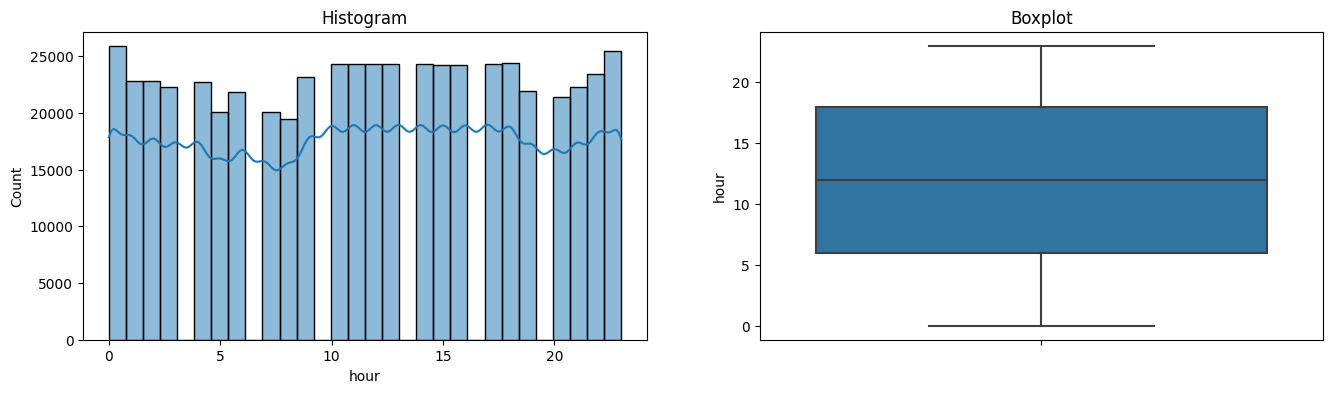


Skewness Value :  -0.04445666759583622


In [31]:
# Set value histogram & boxplot and show skewness from feature hour

diagnostic_plots(X_train, 'hour')
print('\nSkewness Value : ', X_train['hour'].skew())

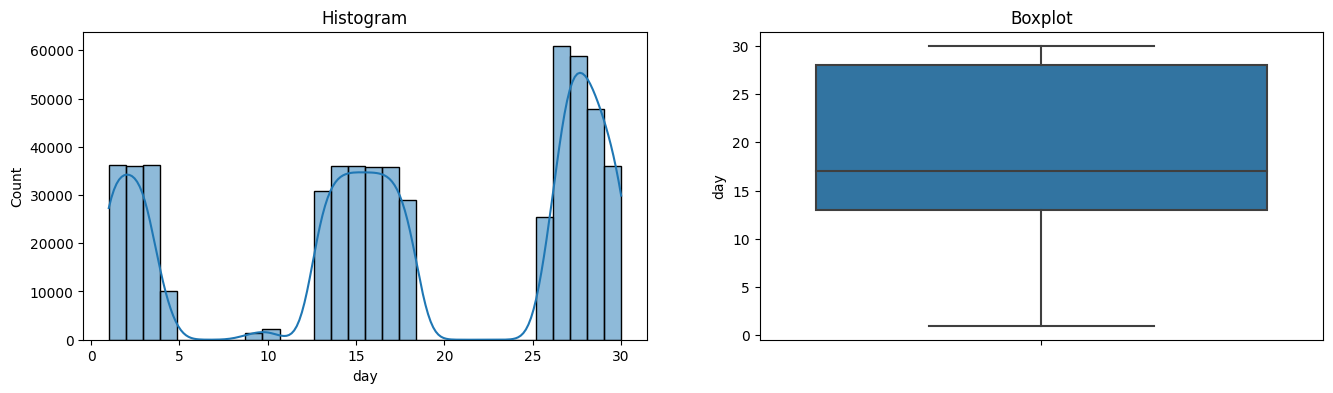


Skewness Value :  -0.3739775252969266


In [32]:
# Set value histogram & boxplot and show skewness from feature day

diagnostic_plots(X_train, 'day')
print('\nSkewness Value : ', X_train['day'].skew())

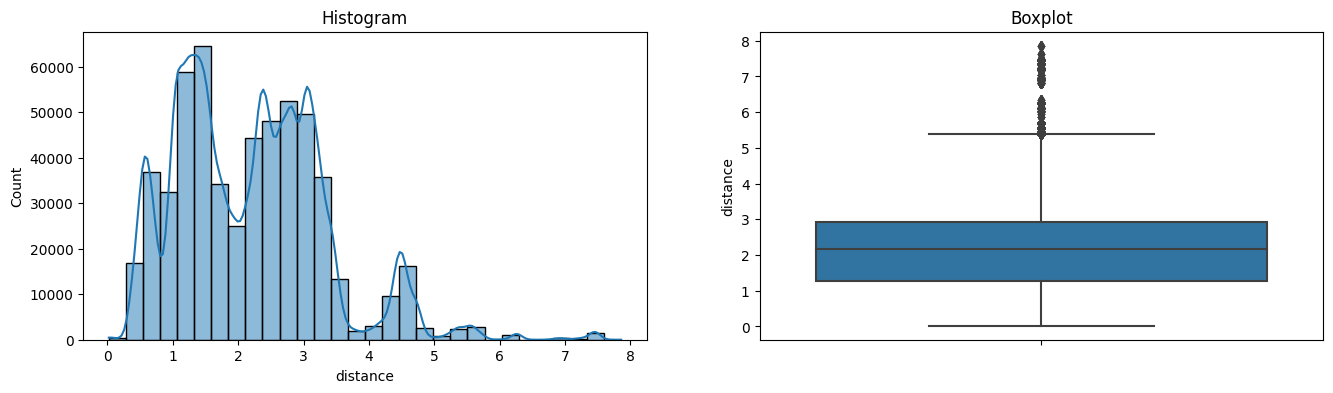


Skewness Value :  0.8330451453580487


In [33]:
# Set value histogram & boxplot and show skewness from feature distance

diagnostic_plots(X_train, 'distance')
print('\nSkewness Value : ', X_train['distance'].skew())

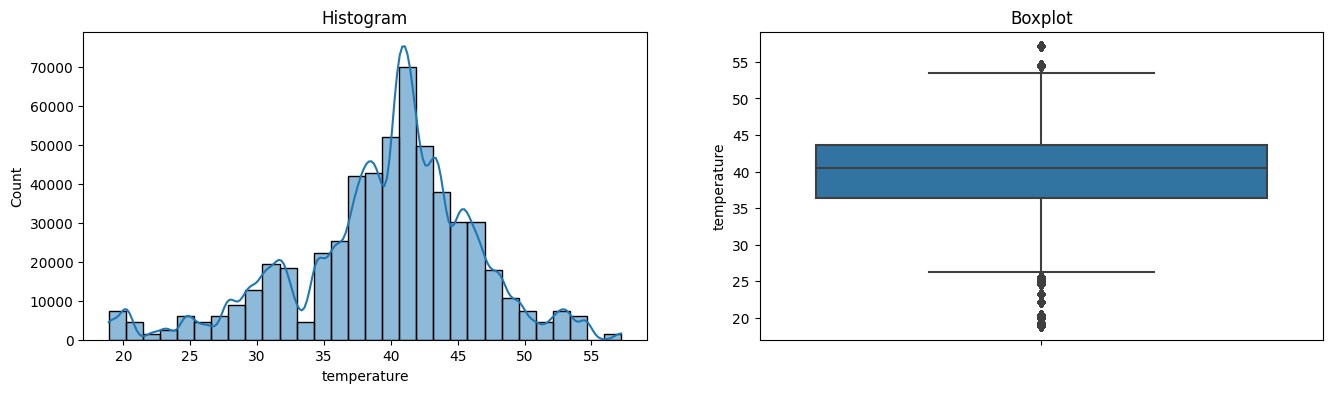


Skewness Value :  -0.6088046846727551


In [34]:
# Set value histogram & boxplot and show skewness from feature temperature

diagnostic_plots(X_train, 'temperature')
print('\nSkewness Value : ', X_train['temperature'].skew())

**Statement**

Based on the histogram, boxplot and skewness level, we can know that:
1. There are no outliers in the hour & day feature, with the data distribution tends to gather on the right side.
2. There are outliers in the distance feature, with data distribution tending to gather on the left.
3. There are outliers in the temperature feature, with data distribution tending to gather on the right.

#### V.III.II. Outlier Detection

Based on what we see through the histogram & boxplot above, the next step is to detect outliers in the distance and temperature features.

##### V.III.II.I. Outlier Detection from distance

In [35]:
# Make function to detection outlier on distance feature

def find_skewed_boundaries_distance(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary_dis = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_dis = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_dis, lower_boundary_dis

In [36]:
# Show upper & lower boundary from distance feature

upper_boundary_dis, lower_boundary_dis = find_skewed_boundaries_distance(X_train, 'distance', 1.5)
upper_boundary_dis, lower_boundary_dis

(5.38, -1.18)

In [37]:
# Store outliers in a variable

outliers_distance = X_train['distance'][(X_train['distance'] < lower_boundary_dis) | (X_train['distance'] > upper_boundary_dis)]

In [38]:
# Show the number and percentage of outliers for `distance`

print('Total distance                                           : ', X_train['distance'].count())
print('Distance with longest than 5.4 and shortest than -1.2    : ', outliers_distance.count())
print('% Distance with longest than 5.4 and shortest than -1.2  : ', outliers_distance.count() / X_train['distance'].count() * 100)

Total distance                                           :  554456
Distance with longest than 5.4 and shortest than -1.2    :  6879
% Distance with longest than 5.4 and shortest than -1.2  :  1.2406755450387406


Since the outliers are only 1.2%, I will remove the outliers.

In [39]:
# Remove the outlier

X_train = X_train[(X_train['distance'] >= lower_boundary_dis) & (X_train['distance'] <= upper_boundary_dis)]
X_train

,hour,day,cab_type,name,distance,temperature
499043,14,13,Uber,Black SUV,1.61,25.55
419201,16,27,Lyft,Shared,2.00,41.00
395682,10,28,Lyft,Lux Black,2.77,34.40
100690,2,18,Uber,WAV,1.91,37.06
619262,7,1,Uber,WAV,2.50,34.37
...,...,...,...,...,...,...
287775,20,29,Uber,Taxi,0.49,42.50
516374,18,29,Uber,UberXL,0.72,43.65
491926,16,26,Lyft,Lyft XL,0.58,45.80
297103,18,26,Lyft,Lux Black XL,1.88,45.46


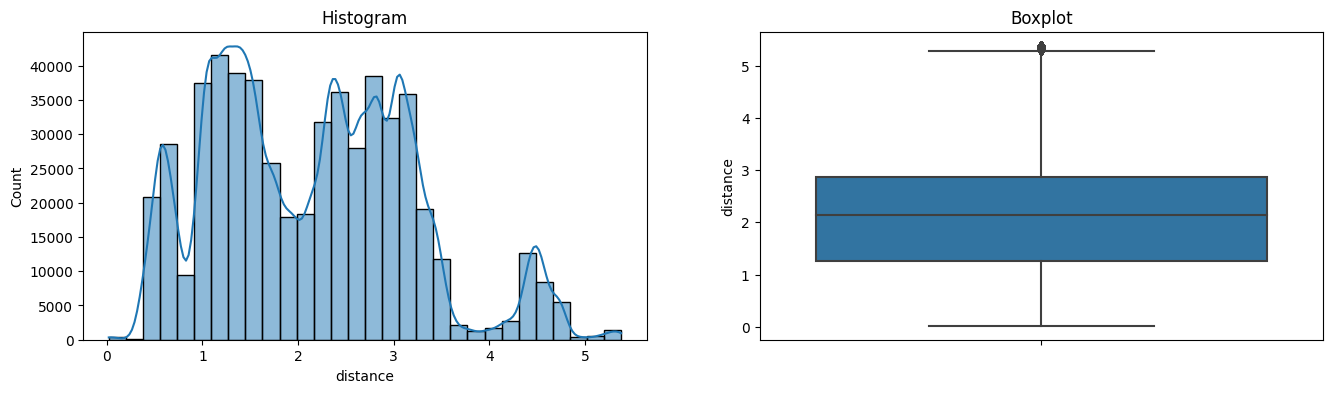


Skewness Value :  0.4458779317452416


In [40]:
# Make plot and show skewness level.

diagnostic_plots(X_train, 'distance')
print('\nSkewness Value : ', X_train['distance'].skew())

**Statement**
- Before outlier removal, the mean value is higher than the median value. This indicates that there are some values that are much higher than most of the data, which pushes the mean value upwards.
- After outlier removal, the difference between the mean and median is smaller. This shows that outlier removal causes less change in the mean value and brings the mean closer to the median.
- Outlier removal can improve the precision of the mean value as an indicator of data centrality, removing the extreme effects of outliers on the mean value.

##### V.III.II.II. Outlier Detection from temperature

In [41]:
# Make function to detection outlier on temperature feature

def find_skewed_boundaries_temp(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary_temp = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_temp = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_temp, lower_boundary_temp

In [42]:
# Show upper & lower boundary from temperature feature

upper_boundary_temp, lower_boundary_temp = find_skewed_boundaries_temp(X_train, 'temperature', 1.5)
upper_boundary_temp, lower_boundary_temp

(54.27499999999999, 25.75500000000001)

In [43]:
# Store outliers in a variable

outliers_temp = X_train['temperature'][(X_train['temperature'] < lower_boundary_temp) | (X_train['temperature'] > upper_boundary_temp)]

In [44]:
# Show the number and percentage of outliers for `temperature`

print('Total temperature                                             : ', X_train['temperature'].count())
print('Temperature with higher than 54.3 and lower than 25.76        : ', outliers_temp.count())
print('% Temperature with higher than 54.3 and lower than 25.76      : ', outliers_temp.count() / X_train['temperature'].count() * 100)

Total temperature                                             :  547577
Temperature with higher than 54.3 and lower than 25.76        :  29002
% Temperature with higher than 54.3 and lower than 25.76      :  5.296424064560783


Since the outliers are only 5.3%, I will remove the outliers.

In [45]:
# Remove the outlier

X_train = X_train[(X_train['temperature'] >= lower_boundary_temp) & (X_train['temperature'] <= upper_boundary_temp)]
X_train

,hour,day,cab_type,name,distance,temperature
419201,16,27,Lyft,Shared,2.00,41.00
395682,10,28,Lyft,Lux Black,2.77,34.40
100690,2,18,Uber,WAV,1.91,37.06
619262,7,1,Uber,WAV,2.50,34.37
159393,22,26,Lyft,Lux Black,2.98,44.93
...,...,...,...,...,...,...
287775,20,29,Uber,Taxi,0.49,42.50
516374,18,29,Uber,UberXL,0.72,43.65
491926,16,26,Lyft,Lyft XL,0.58,45.80
297103,18,26,Lyft,Lux Black XL,1.88,45.46


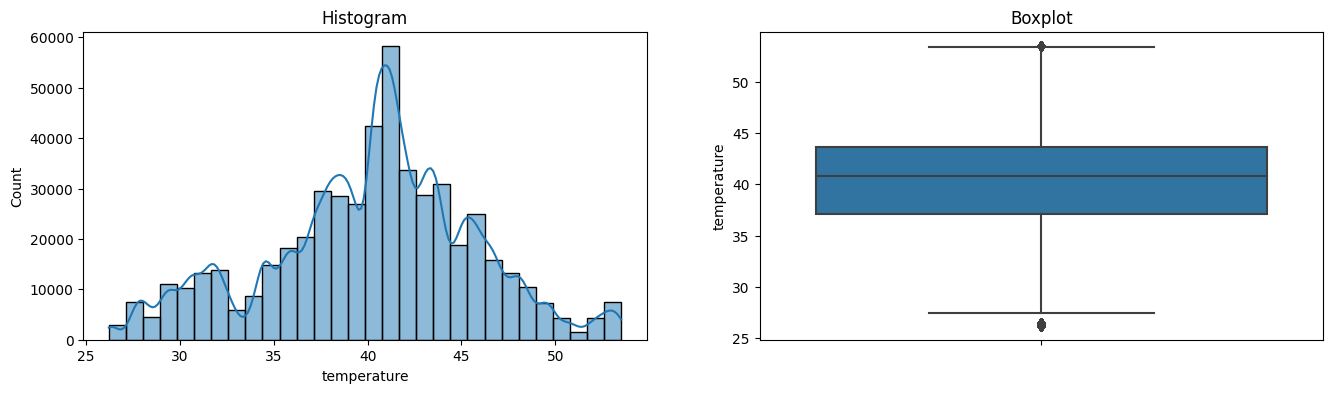


Skewness Value :  -0.23303010365065305


In [46]:
# Make plot and show skewness level.

diagnostic_plots(X_train, 'temperature')
print('\nSkewness Value : ', X_train['temperature'].skew())

**Statement**
- Before outlier removal, the mean value is lower than the median value. This indicates that there are some values that are much lower than most of the data, which pulls the mean value down.
- After outlier removal, the difference between the mean and median is smaller. This indicates that outlier removal causes less change in the mean value and brings the mean closer to the median.
- Outlier removal seems to increase the mean from 39.582958 to 40.188301, but also causes a slight change in the median from 40.490000 to 40.770000.

##### V.III.II.III. Equalize index between X_train and y_train.

In [47]:
# Take the index of X_train that has been cleared of outliers.

X_index = X_train.index.values.tolist()

In [48]:
# Equalize index between X_train and y_train.

X_train = X_train.loc[X_index]

y_train.drop(y_train.index.difference(X_train.index), inplace=True)

In [49]:
# Check the shape between X_train and y_train.

print(X_train.shape)
print(y_train.shape)

(518575, 6)
(518575,)


### V.V. Handling Missing Value

Here I will check the missing values of X_train and y_train, remove the missing values if any, and then equalize the indexes of X_train and y_train.

In [50]:
# Missing Value Checking for X_train

X_train.isna().sum()

hour           0
day            0
cab_type       0
name           0
distance       0
temperature    0
dtype: int64

In [51]:
# Missing Value Checking for y_train

y_train.isna().sum()

40952

In [52]:
# Delete missing value on y_train

y_train = y_train.dropna()
y_train.shape

(477623,)

In [53]:
# Take the index of y_train that has been cleared from missing value.

y_train_index = y_train.index.values.tolist()

In [54]:
# Equalize index between y_train and X_train.

y_train = y_train.loc[y_train_index]

X_train.drop(X_train.index.difference(y_train.index), inplace=True)

In [55]:
# Check shape of X_train and y_train

print(y_train.shape)
print(X_train.shape)

(477623,)
(477623, 6)


In [56]:
# Missing Value Checking for X_test

X_test.isna().sum()

hour           0
day            0
cab_type       0
name           0
distance       0
temperature    0
dtype: int64

In [57]:
# Missing Value Checking for y_test

y_test.isna().sum()

11033

In [58]:
# Delete missing value on y_test

y_test = y_test.dropna()
y_test.shape

(127582,)

In [59]:
# Take the index of y_test that has been cleared from missing value.

y_test_index = y_test.index.values.tolist()

In [60]:
# Equalize index between y_test and X_test.

y_test = y_test.loc[y_test_index]

X_test.drop(X_test.index.difference(y_test.index), inplace=True)

In [61]:
# Check shape of X_train and y_train

print(y_test.shape)
print(X_test.shape)

(127582,)
(127582, 6)


### V.VI. Split between Numeric Columns and Category Columns

In [62]:
# Get Numeric Columns and Categorical Columns

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['hour', 'day', 'distance', 'temperature']
Cat Columns :  ['cab_type', 'name']


In [63]:
# Split train set and test set based on column types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,hour,day,distance,temperature
419201,16,27,2.00,41.00
395682,10,28,2.77,34.40
100690,2,18,1.91,37.06
619262,7,1,2.50,34.37
159393,22,26,2.98,44.93
...,...,...,...,...
358724,5,4,4.37,41.47
516374,18,29,0.72,43.65
491926,16,26,0.58,45.80
297103,18,26,1.88,45.46


**Statement**
1. Columns that are numerical are `hour`, `day`, `distance` & `temperature`.

2. Columns that are categorical are `cab_type` & `name`.

The numerical column will be scaled and the categorical column will be encoded.

### V.VII. Feature Scalling

In this step, I will use the Standard Scaler because the average data distribution is normal. This is evidenced by the distance between the mean and median values.

In [64]:
# Show basic statistic

X_train_num.describe()

,hour,day,distance,temperature
count,477623.000000,477623.000000,477623.000000,477623.000000
mean,11.659520,18.112093,2.141465,40.188420
std,7.071689,10.097413,1.050635,5.527516
min,0.000000,1.000000,0.020000,26.210000
25%,5.000000,14.000000,1.260000,37.110000
50%,12.000000,17.000000,2.140000,40.770000
75%,18.000000,28.000000,2.880000,43.610000
max,23.000000,30.000000,5.380000,53.510000


In [65]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[ 0.6137833 ,  0.88021721, -0.13464684,  0.14682552],
       [-0.23467123,  0.97925258,  0.59824421, -1.04720202],
       [-1.36594394, -0.01110113, -0.22030943, -0.56597274],
       ...,
       [ 0.6137833 ,  0.78118183, -1.48621215,  1.01520918],
       [ 0.89660147,  0.78118183, -0.24886363,  0.95369867],
       [-1.22453485, -0.1101365 , -0.65814044,  0.04732322]])

### V.VIII. Feature Encoding

In this step, I will use OrdinalEncoder because the data is ordinal type.

In [66]:
# Show categorical feature

X_train_cat

,cab_type,name
419201,Lyft,Shared
395682,Lyft,Lux Black
100690,Uber,WAV
619262,Uber,WAV
159393,Lyft,Lux Black
...,...,...
358724,Lyft,Lyft
516374,Uber,UberXL
491926,Lyft,Lyft XL
297103,Lyft,Lux Black XL


In [67]:
# Feature Encoding using Ordinal Encoder

encoder = OrdinalEncoder(categories = [['Uber', 'Lyft'],
                                       ['WAV', 'UberPool', 'UberX', 'UberXL', 'Black', 'Black SUV',
                                        'Shared', 'Lyft', 'Lyft XL', 'Lux', 'Lux Black','Lux Black XL']])
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded  = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[ 1.,  6.],
       [ 1., 10.],
       [ 0.,  0.],
       ...,
       [ 1.,  8.],
       [ 1., 11.],
       [ 1.,  9.]])

### V.IX. Concate between Numeric Columns and Categorical Columns

In [68]:
# Concate columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)
X_train_final

array([[ 0.6137833 ,  0.88021721, -0.13464684,  0.14682552,  1.        ,
         6.        ],
       [-0.23467123,  0.97925258,  0.59824421, -1.04720202,  1.        ,
        10.        ],
       [-1.36594394, -0.01110113, -0.22030943, -0.56597274,  0.        ,
         0.        ],
       ...,
       [ 0.6137833 ,  0.78118183, -1.48621215,  1.01520918,  1.        ,
         8.        ],
       [ 0.89660147,  0.78118183, -0.24886363,  0.95369867,  1.        ,
        11.        ],
       [-1.22453485, -0.1101365 , -0.65814044,  0.04732322,  1.        ,
         9.        ]])

In [69]:
# Create dataframe of X_train_final

X_train_final_df = pd.DataFrame(X_train_final, columns = [num_columns + cat_columns])
X_train_final_df

,hour,day,distance,temperature,cab_type,name
0,0.613783,0.880217,-0.134647,0.146826,1.0,6.0
1,-0.234671,0.979253,0.598244,-1.047202,1.0,10.0
2,-1.365944,-0.011101,-0.220309,-0.565973,0.0,0.0
3,-0.658898,-1.694702,0.341256,-1.052629,0.0,0.0
4,1.462238,0.781182,0.798124,0.857815,1.0,10.0
...,...,...,...,...,...,...
477618,-0.941717,-1.397596,2.121135,0.231855,1.0,7.0
477619,0.896601,1.078288,-1.352959,0.626246,0.0,3.0
477620,0.613783,0.781182,-1.486212,1.015209,1.0,8.0
477621,0.896601,0.781182,-0.248864,0.953699,1.0,11.0


## VI. Model Definition

In [70]:
# Training using Linear Regression

model_lin_reg = LinearRegression()

## VII. Model Training

In [71]:
# Train the model

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

## VIII. Model Evaluation

In [72]:
# Predict Train-set and Test-set

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([ 5.55748121, 25.78845638,  3.75450015, ..., 10.43692816,
       27.71847616, 17.4505382 ])

In [73]:
# Display y_train

y_train

419201     5.0
395682    22.5
100690     7.5
619262    10.5
159393    26.0
          ... 
358724    13.5
516374    12.5
491926     9.0
297103    32.5
589041    13.5
Name: price, Length: 477623, dtype: float64

In [74]:
# Model Evaluation using MAE, MSE, RMSE, MAPE & r2score

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))
print('')
print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))
print('')
print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('')
print('MAPE train = ', mean_absolute_percentage_error(y_train, y_pred_train))
print('MAPE test = ', mean_absolute_percentage_error(y_test, y_pred_test))
print('')
print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  2.9345250097610407
MAE test =  2.9711434783264794

MSE train =  15.736934807365827
MSE test =  16.1764224328376

RMSE train =  3.9669805655392145
RMSE test =  4.021992346193314

MAPE train =  0.22725098298085772
MAPE test =  0.22779003317791705

r2score train =  0.8146423895380941
r2score test =  0.8138899502611526


Based on the evaluation results of a given model, we can draw some insights regarding the performance of the regression or forecasting model:

- Consistency of Performance on Train and Test Data:
The MAE, MSE, RMSE, MAPE, and r2score values for the train and test data are relatively close to each other. This indicates that the model tends to have consistent performance on both datasets. This consistency is an indication that the model does not experience overfitting on the train data and is able to perform good generalization on the test data that has never been seen before.

- Low Prediction Error Rate:
Low MAE, MSE, and RMSE values (close to zero) indicate that the model has an overall low prediction error rate. MAE, MSE, and RMSE measure prediction error in different ways, but the results show that the difference between predicted and true values tends to be small, and the model tends to provide accurate predictions.

- Evaluation of Accurate Model Predictions:
An r2score close to 1 indicates that the model can explain most of the variability of the data. r2score measures the degree of variance of the dependent variable that can be explained by the model, and higher values close to 1 indicate that the model performs well in explaining the data.

- Use of MAPE as an Evaluation Metric:
The use of MAPE (Mean Absolute Percentage Error) gives an idea of the percentage prediction error, which can be more intuitive in interpretation. In this case, the MAPE values of the train and test are close to 0.23, which indicates that the average percentage error of the model prediction is about 23%. The lower the MAPE value, the better the prediction quality of the model.

In [75]:
# Find Intercept & Slope

intercept = model_lin_reg.intercept_
slope     = model_lin_reg.coef_

print('Intercept    : ', intercept)
print('Slope        : ', slope)

Intercept    :  4.437152142341986
Slope        :  [ 5.38375253e-03  1.02819567e-03  3.05301262e+00  4.73380631e-03
 -2.54788488e+01  4.50089197e+00]


## IX. Model Saving

In [76]:
# Save the files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

## X. Model Inference

In [77]:
# Load all files

with open('list_cat_cols.txt', 'r') as file_1:
  list_cat_cols = json.load(file_1)

with open('list_num_cols.txt', 'r') as file_2:
  list_num_cols = json.load(file_2)

with open('model_scaler.pkl', 'rb') as file_3:
  scaler = pickle.load(file_3)

with open('model_encoder.pkl', 'rb') as file_4:
  encoder = pickle.load(file_4)

with open('model_lin_reg.pkl', 'rb') as file_5:
  model_lin_reg = pickle.load(file_5)

In [78]:
#Create new data

data_inf = {
    'hour'          : 22,
    'day'           : 30,
    'distance'      : 1.11,
    'temperature'   : 40.13,
    'cab_type'      : 'Uber',
    'name'          : 'UberXL',
}

data_inf = pd.DataFrame([data_inf])
data_inf

,hour,day,distance,temperature,cab_type,name
0,22,30,1.11,40.13,Uber,UberXL


In [79]:
# Split between numerical columns and categorical columns

data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]
data_inf_num

,hour,day,distance,temperature
0,22,30,1.11,40.13


In [80]:
# Feature scaling and feature encoding

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_encoded = encoder.transform(data_inf_cat)
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis = 1)

In [81]:
# Predict using Linear Regression

y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf

array([14.95155147])

## XI. Conclusion

- This model is a good fit, because based on the evaluation of the model that has been done, the train and test results have a relatively small gap. This is reinforced by my next conclusion.
- I used the MAE, MSE, RMSE, MAPE and r2score evaluation models. Based on the comparison results using MAE, MSE, RMSE, MAPE and r2score, we can see that the gap between the actual train and test and the prediction train and test is very small and the average gap is approximately below 1. Based on the r2score results, we can see that this model has an accuracy between the actual train and test and the prediction train and test of approximately 81% and the average percentage error between the actual train and test and the prediction train and test is approximately 23% based on the MAPE results.
- If we look at the evaluation results of this model and the features chosen to create this model, we can see that the features we chose are good enough because they give us an r2score result of 81%, but if we want to reduce the error rate in this model, we can add features to support our analysis to provide higher r2score results because in the dataset there are 57 kinds of features that we can explore more deeply.

## XII. References

1. https://pengayaan.com/strategi-penetapan-harga-apa-yang-digunakan-uber.html
2. https://www.ridester.com/surge-pricing/
3. https://www.ridesharingdriver.com/whats-the-difference-between-lyft-lyftplus-and-line/
4. https://www.ridesharingdriver.com/whats-the-difference-between-uberx-xl-uberplus-and-black-car/